## Alexander Megahed Villeda Storytelling with Data Project

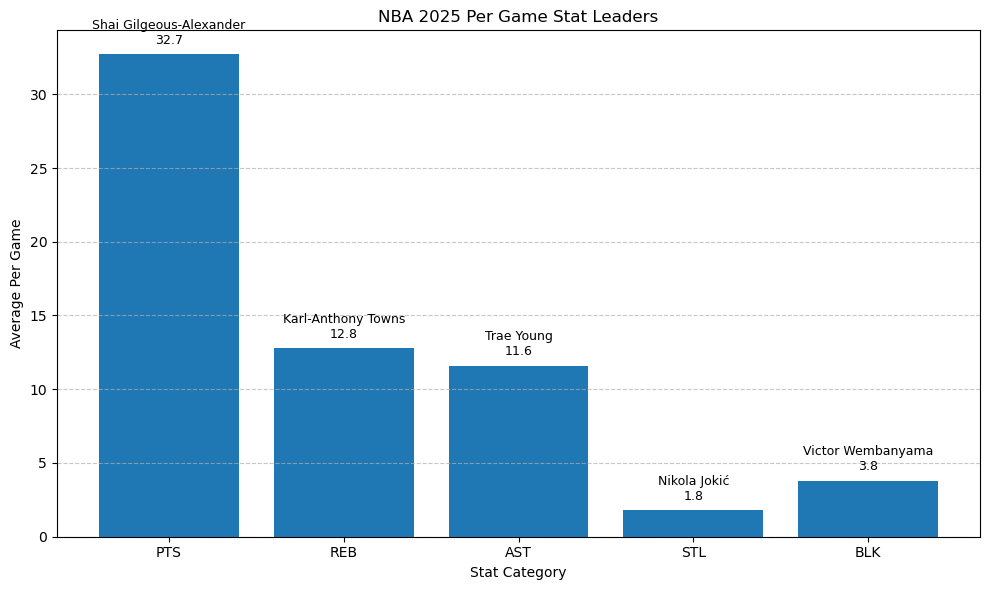

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("NBA_2025_per_game.csv")

# Use the first row as column headers and drop the first row
df.columns = df.iloc[0]
df = df[1:]

# Keep only relevant columns
stats = ["PLAYER", "PTS", "REB", "AST", "STL", "BLK"]
df = df[stats]

# Convert stat columns to numeric
for col in stats[1:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Find the stat leaders
leaders = []
for stat in stats[1:]:
    top_player = df.loc[df[stat].idxmax()]
    leaders.append({
        "Stat": stat,
        "Player": top_player["PLAYER"],
        "Value": top_player[stat]
    })

# Convert to DataFrame
leaders_df = pd.DataFrame(leaders)

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(leaders_df["Stat"], leaders_df["Value"])

# Add labels
for bar, player, value in zip(bars, leaders_df["Player"], leaders_df["Value"]):
    height = bar.get_height()
    label = f"{player}\n{value:.1f}"  # Player name on top, value on bottom
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, label, 
             ha='center', va='bottom', fontsize=9)


plt.title("NBA 2025 Per Game Stat Leaders")
plt.ylabel("Average Per Game")
plt.xlabel("Stat Category")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Shai Gilgeous-Alexander is dominating the scoring race at 32.7 PPG, well ahead of the pack, while Karl-Anthony Towns owns the boards (12.8 RPG) and Trae Young is the clear playmaking leader (11.6 APG). 

## Nikola Jokić’s 1.8 steals and Victor Wembanyama’s 3.8 blocks show that defensive impact leaders can shine in different ways. Generally, In the NBA few players lead in more than one category.

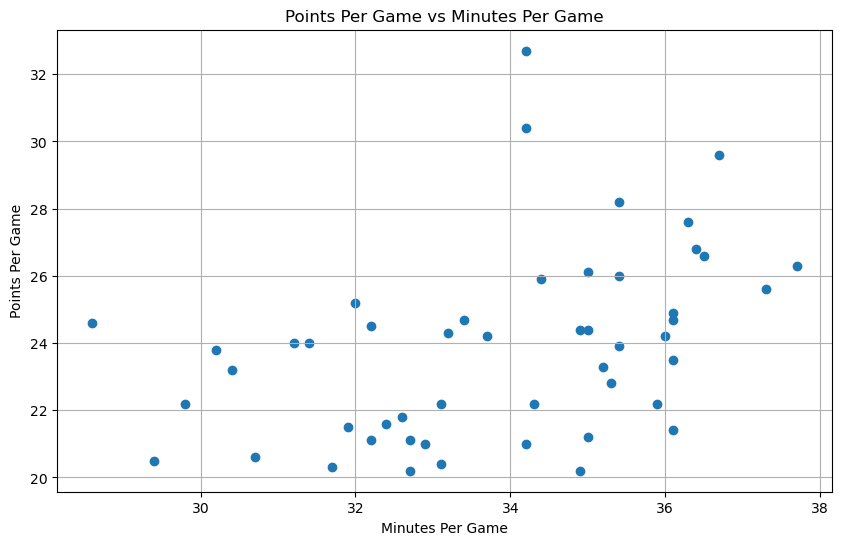

The correlation coefficient between Minutes Per Game and Points Per Game is: 0.406969577768129


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('NBA_2025_per_game.csv', skiprows=1)

plt.figure(figsize=(10,6))
plt.scatter(df['MIN'], df['PTS'])
plt.title('Points Per Game vs Minutes Per Game')
plt.xlabel('Minutes Per Game')
plt.ylabel('Points Per Game')
plt.grid(True)
plt.savefig('pts_vs_min_scatter_plot.png')
plt.show()

correlation = df['MIN'].corr(df['PTS'])
print(f"The correlation coefficient between Minutes Per Game and Points Per Game is: {correlation}")

### While more minutes generally means more points, there are outliers — like a few players scoring 26+ PPG on under 34 minutes, showing elite efficiency. Conversely, some high-minute players hover around 21–23 PPG, highlighting that opportunity doesn’t always equal production. Certain players make the most of their time on the floor and some might be underperforming given their workload.

### The correlation coefficient of 0.41 is closer to 0 than to 1, suggesting a positive moderate relationship, other factors besides playing time also significantly influence a player's points per game.

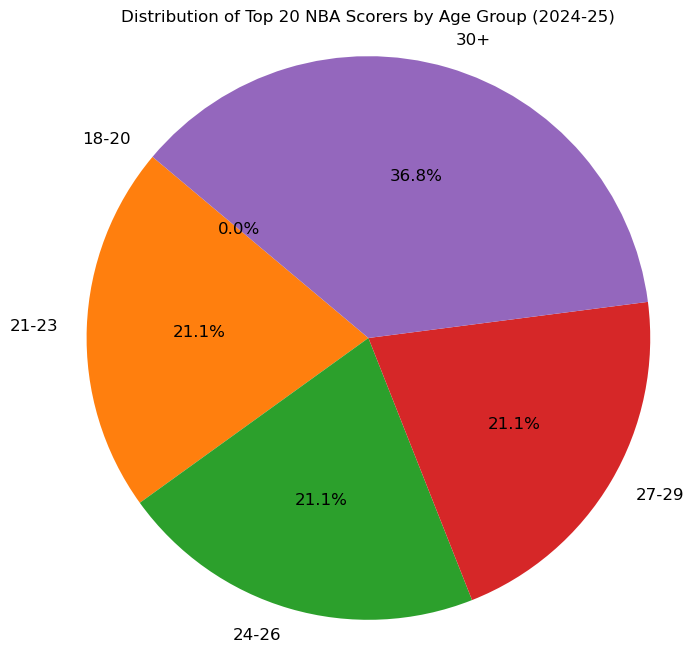

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure 'PTS' and 'AGE' are numeric
df['PTS'] = pd.to_numeric(df['PTS'], errors='coerce')
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')

# Drop rows with missing data
df = df.dropna(subset=['PTS', 'AGE'])

# Sort players by points scored descending and take top 20 (adjust as needed)
top_scorers = df.sort_values(by='PTS', ascending=False).head(20)

# Define age bins and labels
bins = [18, 21, 24, 27, 30, 40]
labels = ['18-20', '21-23', '24-26', '27-29', '30+']

# Create age group column
top_scorers['Age Group'] = pd.cut(top_scorers['AGE'], bins=bins, labels=labels, right=False)

# Count number of top scorers in each age group
age_group_counts = top_scorers['Age Group'].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title('Distribution of Top 20 NBA Scorers by Age Group (2024-25)')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()


## Veterans 30+ make up the largest slice at 36.8%, proving that experience still matters in high-volume scoring. Young stars aged 21–29 share the rest almost evenly, but strikingly, no one under 21 cracked the top 20, showing that age does not slow down production as miuch as one would assume; scoring dominance is usually earned with years in the league.